In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["credit-card-holder-data.csv"]), na_values = "***")
df.head()

Saving credit-card-holder-data.csv to credit-card-holder-data.csv


,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **EDA**

In [3]:
df = pd.read_csv("credit-card-holder-data.csv")
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


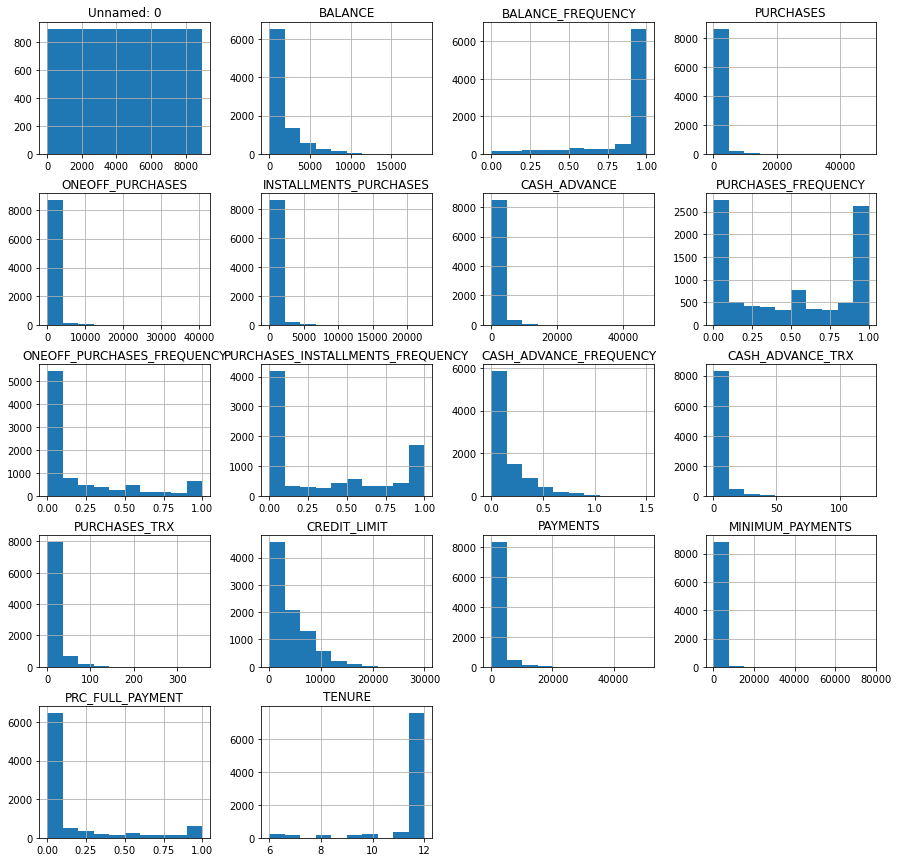

In [6]:
# Plot histograms of all data features
df.hist(figsize=(15, 15))
plt.show()

In [7]:
# Get the list of categorical features (i.e., having string column names) 
cat_cols = [col for col in df.columns if df[col].dtypes=="O"]
cat_cols

[]

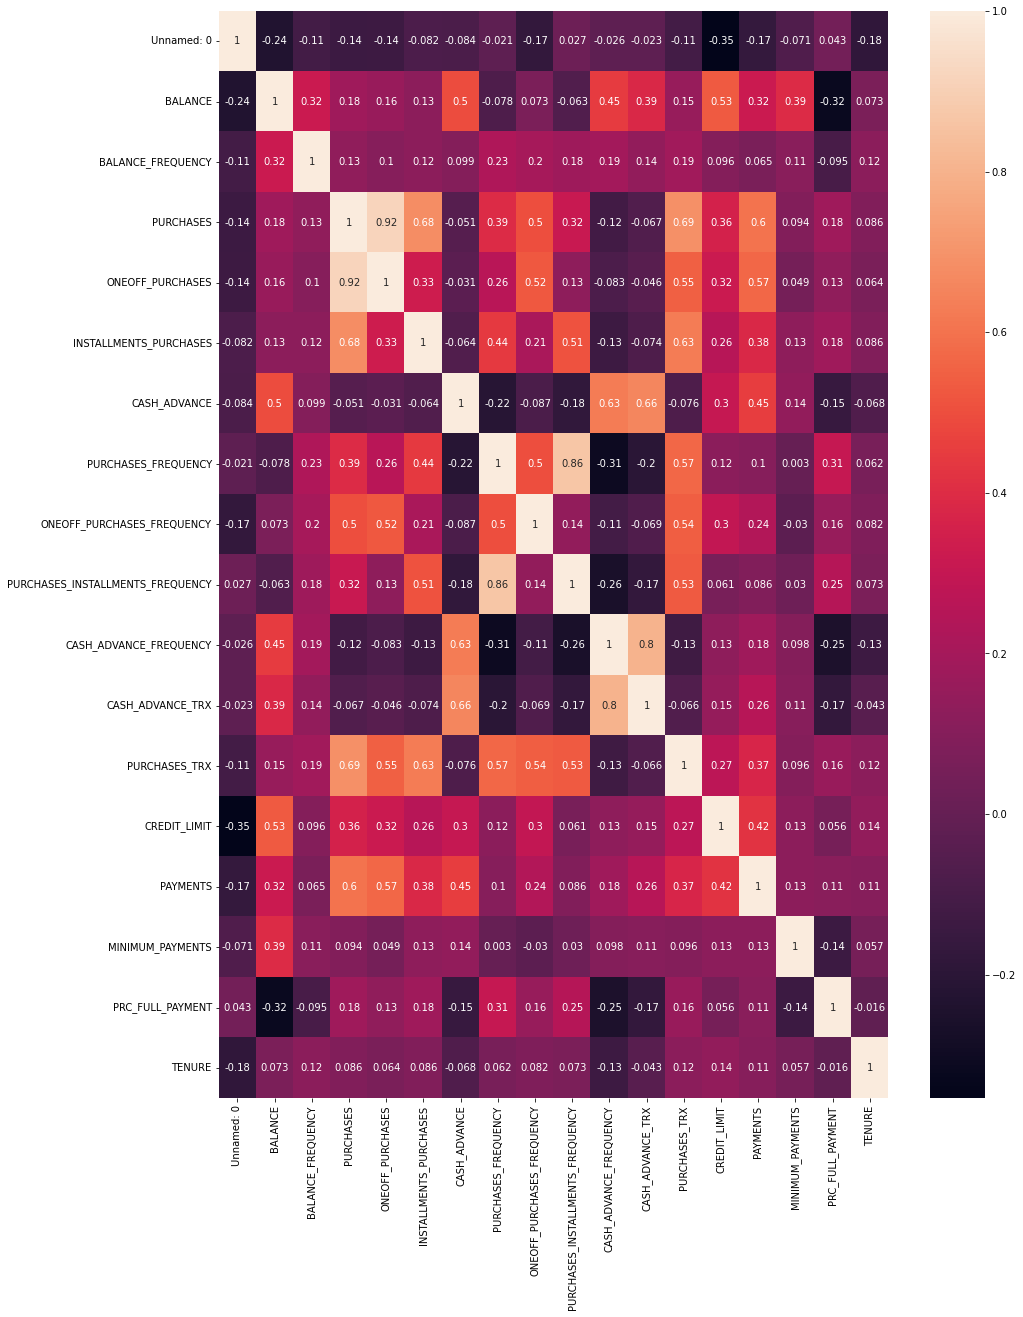

In [8]:
# Polt the correlation heatmap between pairs of features.
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# DATA PROCESSING

In [9]:
# Make a copy of the data
data = df.copy()
# Import StandardScaler to standardize the data features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit (calculate mean and standard deviation) and transform (substract mean and divide by std) the data
scaled_data = scaler.fit_transform(data.values)

# K-MEANS CLUSTERING MODEL

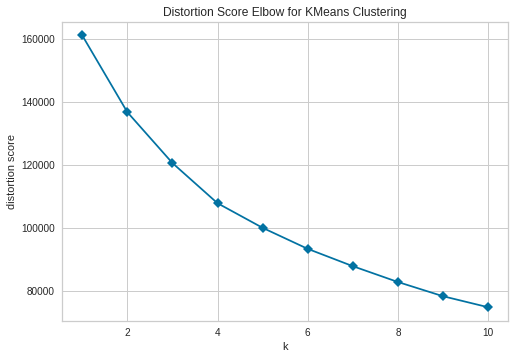

In [10]:
# Import KElbowVisualizer to use Elbow method
from yellowbrick.cluster import KElbowVisualizer

# Import KMeans library to use Kmeans algorithm
from sklearn.cluster import KMeans, MiniBatchKMeans
elbow_method = KElbowVisualizer(KMeans(), k=(1,11), timings=False, locate_elbow=False)
elbow_method.fit(scaled_data)
elbow_method.show()

In [11]:
# Let us pick four clusters
kmeans_model = KMeans(n_clusters=4)

# Run K-means algorithm with K=4
kmeans_model.fit(scaled_data)

KMeans(n_clusters=4)

In [12]:
# Show cluster label of training data samples
kmeans_model.labels_

array([2, 0, 1, ..., 1, 2, 2], dtype=int32)

In [13]:
# Make cluster label prediction of new data samples (assume here we use scaled_data as tes data samples).
kmeans_model.predict(scaled_data)

array([2, 0, 1, ..., 1, 2, 2], dtype=int32)

In [14]:
# Show location of cluster centroids 
kmeans_model.cluster_centers_

array([[-0.27558385,  1.48496483,  0.38927151, -0.23121128, -0.16034308,
        -0.25220322,  1.7001221 , -0.49754723, -0.20416013, -0.44742299,
         1.73192405,  1.60632171, -0.27937564,  0.86361649,  0.61624226,
         0.50583135, -0.40836958, -0.08161667],
       [ 0.05117728, -0.32436758,  0.24344292,  0.10490886, -0.00398922,
         0.25515796, -0.36823811,  0.984386  ,  0.31407208,  0.8750075 ,
        -0.46352773, -0.36086257,  0.29423003, -0.08202202, -0.14274783,
        -0.09313893,  0.39343411,  0.05879321],
       [ 0.0992301 , -0.26775188, -0.36832202, -0.34314989, -0.23090838,
        -0.38695524, -0.1796497 , -0.79689711, -0.39051644, -0.71243525,
        -0.0916814 , -0.15603831, -0.47462658, -0.33866029, -0.26254212,
        -0.12128254, -0.25862157, -0.05886038],
       [-0.57374886,  0.94001784,  0.46304787,  3.08038239,  2.68096613,
         2.35827427, -0.15574961,  1.1356815 ,  1.78671353,  1.06291035,
        -0.32247704, -0.17427561,  2.95737227,  1.436

# CLUSTER VISUALIZATION

In [15]:
# Import PCA library
from sklearn.decomposition import PCA

# Find all principal components (i.e, eigen vectors of the covariance matrix, and eigen values) of the data, and equal to the number of data features.
pca = PCA(n_components=len(data.columns))
pca.fit(scaled_data)

PCA(n_components=18)

In [16]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

Amount of variance carried in each principal components (eigen values) :
[4.68299658e+00 3.49219892e+00 1.50373598e+00 1.38787048e+00
 1.08670343e+00 1.04389589e+00 8.76789015e-01 7.46495154e-01
 6.63114180e-01 6.28425713e-01 5.20633319e-01 4.02851918e-01
 2.99963253e-01 2.41946034e-01 2.06767211e-01 1.72219376e-01
 4.53933082e-02 1.16466503e-05]

Ratio of variance carried in each principal components (eigen values) :
[2.60137408e-01 1.93989374e-01 8.35315536e-02 7.70953003e-02
 6.03656672e-02 5.79877364e-02 4.87050583e-02 4.14673192e-02
 3.68355605e-02 3.49086388e-02 2.89208416e-02 2.23781615e-02
 1.66627632e-02 1.34399445e-02 1.14857838e-02 9.56667412e-03
 2.52156869e-03 6.46963835e-07]

Cummulative sum of all ratios :
[0.26013741 0.45412678 0.53765833 0.61475364 0.6751193  0.73310704
 0.7818121  0.82327942 0.86011498 0.89502362 0.92394446 0.94632262
 0.96298538 0.97642533 0.98791111 0.99747778 0.99999935 1.        ]


In [19]:
# We test the three most important principal components 
pca3 = PCA(n_components=3)

# Fit (i.e., construct the 3-dimensional PCA space) and transform (i.e., project the original data points into the 3-dimensional PCA space).
pca3_data = pca3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional PCA space, namely "pca_1", "pca_2" and "pca_3"
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])

In [20]:
# Show the data frame
pca3_df

,pca_1,pca_2,pca_3
0,-1.510510,-0.776007,0.895398
1,-0.864434,2.756664,0.857130
2,1.160050,-0.175119,0.655183
3,-0.664896,0.316687,1.910960
4,-1.414255,-0.389985,0.822969
...,...,...,...
8945,-0.632786,-2.247355,-1.696516
8946,-0.823476,-1.861425,-1.894684
8947,-1.187318,-2.015204,-1.132992
8948,-2.551607,-0.805459,0.320232


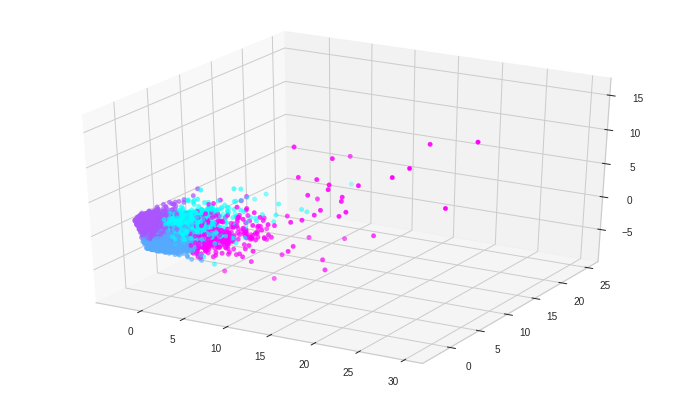

In [21]:
# Plot the data points in the 3-dimensional space with feature pca_1, pca_2 and pca_3, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca3_df.pca_1, pca3_df.pca_2, pca3_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

In [22]:
# We test the two most important principal components 
pca2 = PCA(n_components=2)

# Fit (i.e., construct the 2-dimensional PCA space) and transform (i.e., project the original data points into the 2-dimensional PCA space).
pca2_data = pca2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

In [23]:
pca2_df.head()

,pca_1,pca_2
0,-1.510506,-0.776015
1,-0.864424,2.756752
2,1.160037,-0.175135
3,-0.664902,0.316753
4,-1.414247,-0.390032


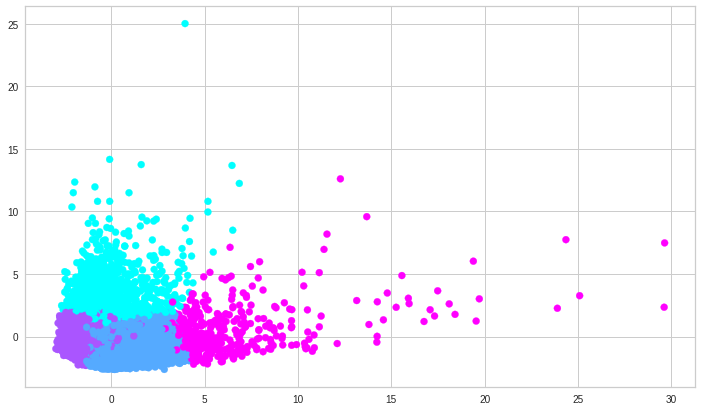

In [24]:
# Plot the data points in the 2-dimensional space with feature pca_1 and pca_2, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca2_df.pca_1, pca2_df.pca_2, c=kmeans_model.labels_, cmap="cool")
plt.show()

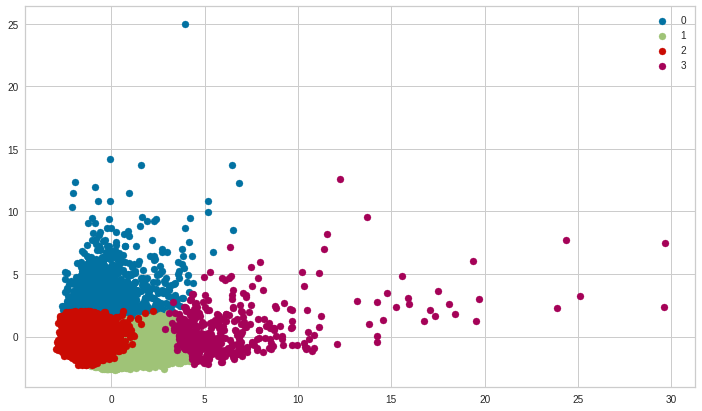

In [25]:
# Visualize the cluster with legend
plt.figure(figsize=(12, 7))
ax = plt.subplot()

# List of labels
group = kmeans_model.labels_

# Plot data samples in each label group: 0, 1 and 2.
for g in np.unique(group):
    index = np.where(group==g)     # Get all indices of label group g
    ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label
ax.legend()
plt.show()

In [26]:
# Save model using pickle library
import pickle
file_name = "model.sav"                              # Path to save the model
pickle.dump(kmeans_model, open(file_name, "wb"))

In [27]:
# Load the saved model using pickle library
file_name = "model.sav"
load_model = pickle.load(open(file_name, "rb"))

In [28]:
# Access cluster information from the loaded model
cluster = load_model.labels_
cluster_0 = np.where(cluster==0)   # indices of data samples in cluster 0
cluster_1 = np.where(cluster==1)   # indices of data samples in cluster 1
cluster_2 = np.where(cluster==2)
cluster_3 = np.where(cluster == 3)

In [36]:
# Get data samples in cluster 0
df1 = data.iloc[cluster_0]
df1

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
15,15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12
23,23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12
24,24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11
28,28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,8835,1868.576501,1.000000,1337.34,1294.84,42.50,3132.667468,0.833333,0.833333,0.166667,1.000000,10,23,3000.0,3236.129237,384.230828,0.000000,6
8840,8840,2588.410789,0.888889,787.40,0.00,787.40,3762.650329,0.777778,0.000000,0.666667,0.555556,10,17,3000.0,1739.406636,1769.001229,0.000000,9
8857,8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7
8858,8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7


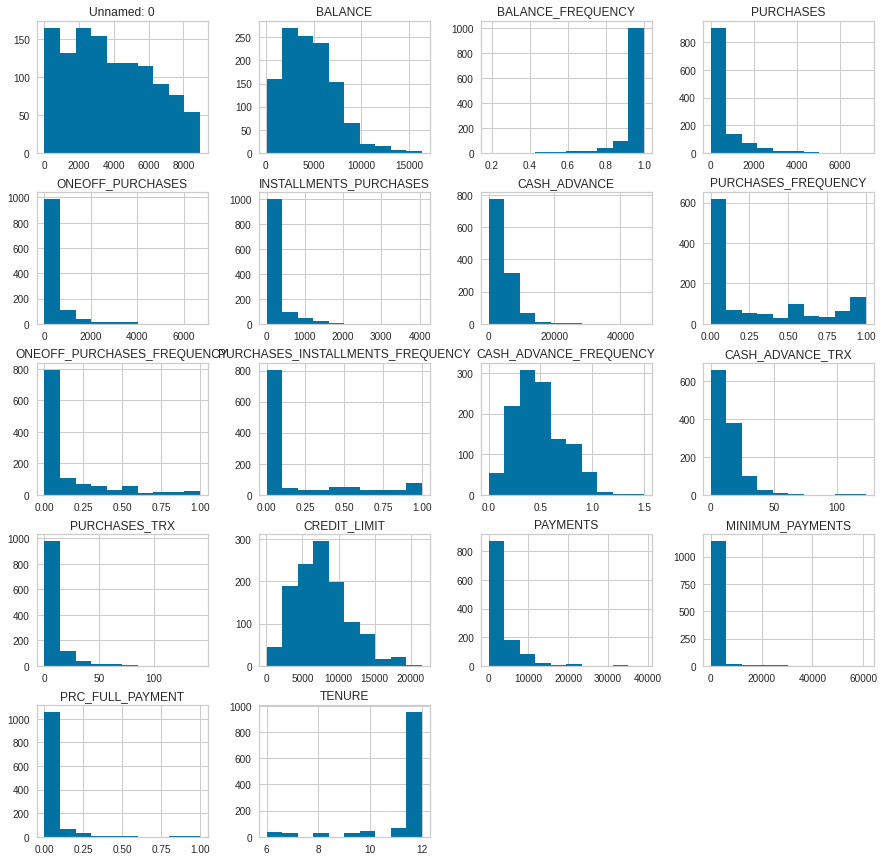

In [41]:
df1.hist(figsize=(15, 15))
plt.show()

In [39]:
# Get data samples in cluster 0
df2 = data.iloc[cluster_1]
df2

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12
5,5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12
7,7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12
10,10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12
12,12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6
8942,8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6
8945,8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6
8946,8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,275.861322,864.206542,0.00,6


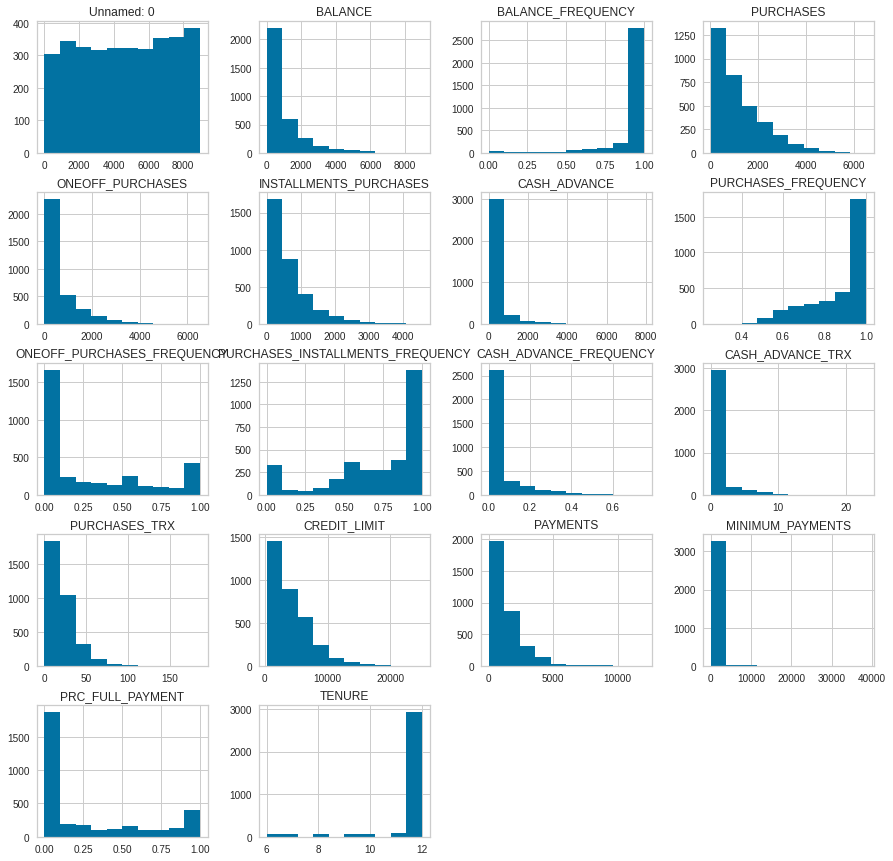

In [42]:
df2.hist(figsize=(15, 15))
plt.show()

In [44]:
df3 = data.iloc[cluster_2]
df3

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
8,8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12
9,9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6
8943,8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6
8948,8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


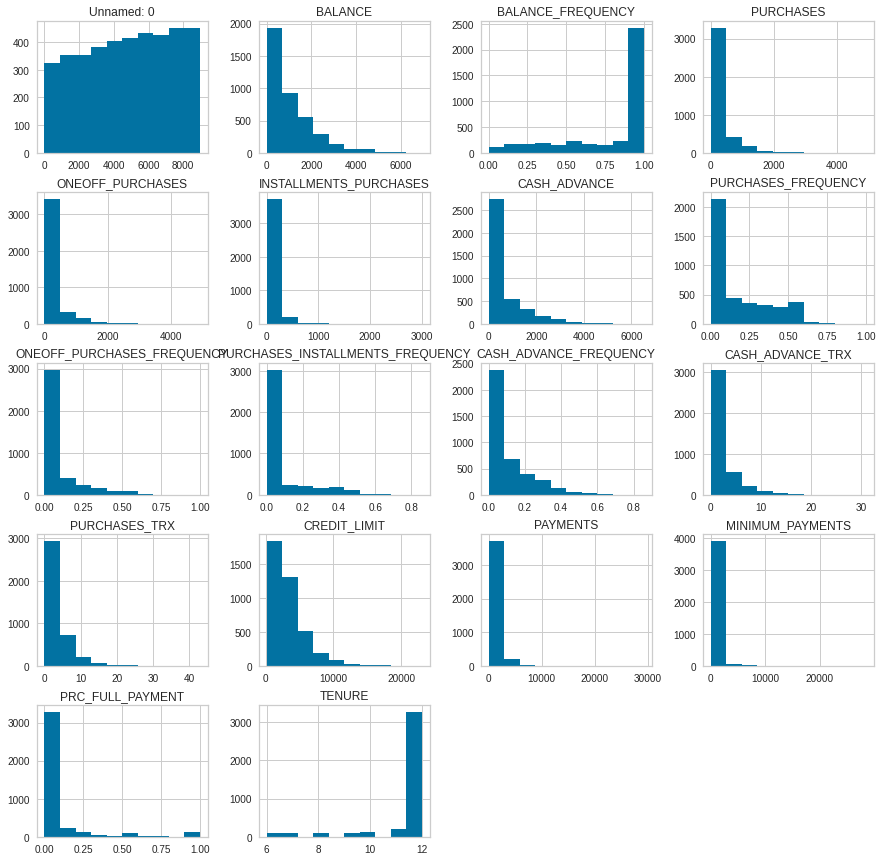

In [45]:
df3.hist(figsize=(15, 15))
plt.show()

In [46]:
df4 = data.iloc[cluster_3]
df4

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6,6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
21,21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12
57,57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12
84,84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12
90,90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12
8541,8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12
8662,8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12
8689,8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12


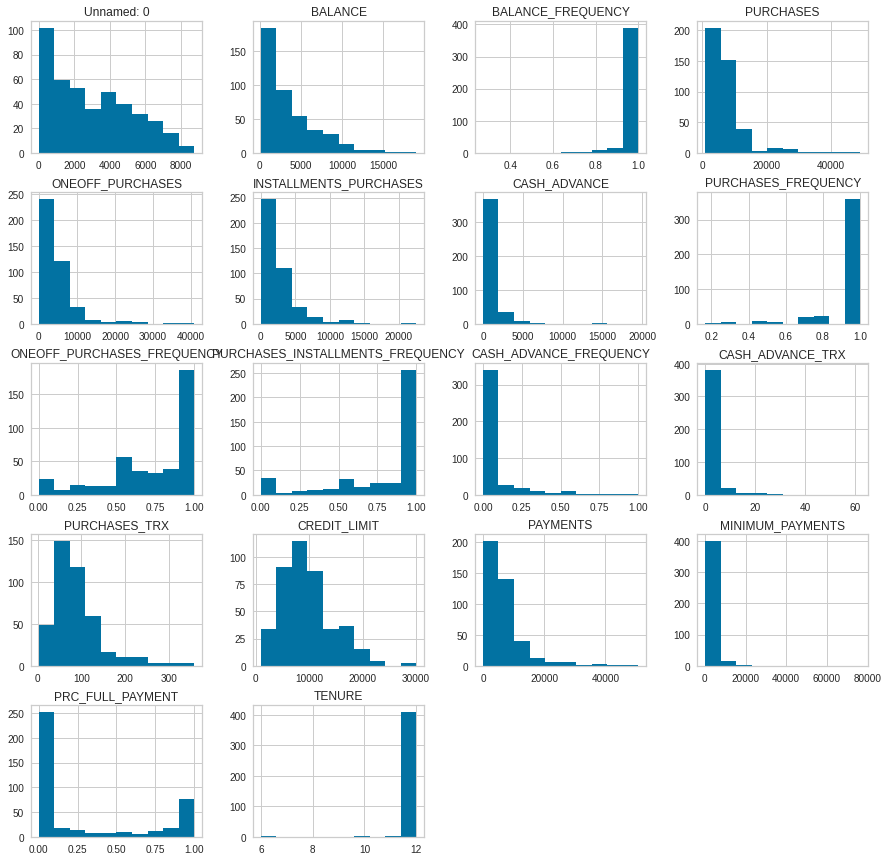

In [47]:
df4.hist(figsize=(15, 15))
plt.show()

**T-SNE**

In [48]:
# Import hierarchical clustering algorithm from scipy
from scipy.cluster import hierarchy

# Run the algorithm without specifying the number of clusters
clusters = hierarchy.linkage(scaled_data, method="ward")

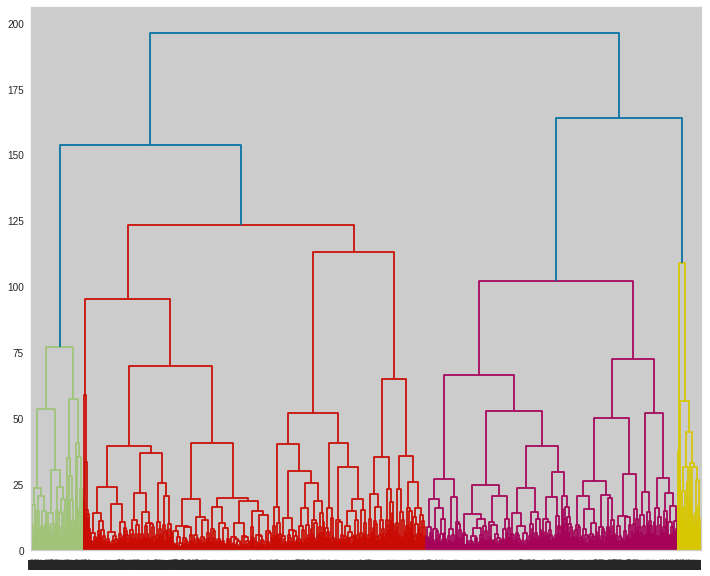

In [49]:
# Plot the hierarchical clusters
plt.figure(figsize=(12, 10))
dendrogram = hierarchy.dendrogram(clusters)

In [50]:
# Import AgglomerativeClustering from scikit-learn
from sklearn.cluster import AgglomerativeClustering

# Run the hierarchical clustering algorithm with
clustering = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(scaled_data) # Perform the cut at 4 clusters
clustering.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [51]:
# Import TSNE library
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123) # Initialize TSNE with the TSNE space dimension (n_components)
tsne_features = tsne.fit_transform(scaled_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.001s...
[t-SNE] Computed neighbors for 8950 samples in 2.729s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.585618
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.958267
[t-SNE] KL divergence after 1000 iterations: 1.668143


[Text(0.5, 1.0, 'Cluster visualization on a 2-dimensional space')]

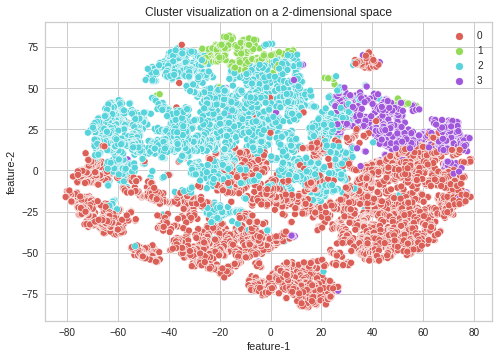

In [52]:
# Import seaborn library for cluster visualization
import seaborn as sns

# Create a data frame with TSNE features and data label
df = pd.DataFrame()
df["label"] = clustering.labels_
df["feature-1"] = tsne_features[:,0]
df["feature-2"] = tsne_features[:,1]

# Visualize the clusters
sns.scatterplot(x="feature-1", y="feature-2", # Set the two TSNE features to the axes
                hue=df.label.tolist(), # Set the label
                palette=sns.color_palette("hls", 4),
                data=df).set(title="Cluster visualization on a 2-dimensional space")

# CLUSTERS' CHARACTERISTICS

Cluster 1: Purchases, On-off purchases, installments purchases and their frequency are lowest, around 0, meaning those customers hardly made purchases.  as well.  However, this group of customers have credit limit high at around 5000 to 10000 and their frequency of the cash in advance being paid is high at around 0.5 to 1.0. Hence, if there are offers such as reward programs, discounts using credit card which intrigues them to use the benefits of credit cards, they could be the best target.


Cluster 2: 
Compared to cluster 1 and 3, On-off purchases, installment purchases and their frequency are slightly higher. The frequency of purchases in installments being done is mostly 1.0. The purchases frequency is mostly 1.0, meaning they are the group of customers frequently purchase. However, this group hardly use “Cash in Advance” to purchase goods. 


Cluster 3: Like Cluster 1, purchases, on-off purchases, installments_purchases and their purchases frequency lowest mostly around 0. However, The amount of payments done by users or the frequency of the cash in advance being paid is very low and mostly 0. 


Cluster 4: With this group, Purchases, Installments, On-off purchases frequency are highest among all clusters at mostly 1.0 (frequently purchased). The number of purchase transactions made is also the highest at around 100-200. This group also has a high limit of credit card for user. However, this group barely pay the cash in advance or made transactions with “Cash in advanced”
